In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
file_path = "911_calls_data_to_explore/911_Calls_for_Service.csv"
data = pd.read_csv(file_path, sep="\t")

In [17]:
# Display the first few rows of the dataset
print("Preview of the dataset:")
data.head()

Preview of the dataset:


,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode,NeedsSync,ESRI_OID,Unnamed: 19
0,1,10CC9DA95FF34377,2021/01/04 16:33:00+00,Low,TRU,HIT AND RUN,P210041843,3500 AILSA AV,3500 AILSA AV BALTIMORE MD,Waltherson,Northeastern,426.0,2.0,D4,Lauraville,Census Tract 2701.02,21214.0,0,79,NaN
1,2,10CC9DA95FF3518A,2021/01/04 17:34:00+00,Medium,WD,NARCOTICS,P210042073,1700 N CALHOUN ST,1700 N CALHOUN ST BALTIMORE MD,Sandtown-Winchester,Western,742.0,7.0,D9,Sandtown-Winchester/Harlem Park,Census Tract 1501,21217.0,0,80,NaN
2,3,10CC9DA95FF35312,2021/01/04 17:40:00+00,Low,CD,OTHER,P210042088,2000 DRUID HILL AV,2000 DRUID HILL AV BALTIMORE MD,Druid Heights,Central,131.0,11.0,D8,Upton/Druid Heights,Census Tract 1403,21217.0,0,81,NaN
3,4,10CC9DA95FF3543D,2021/01/04 17:45:00+00,Medium,SD,NARCOTICS,P210042103,600 S PAYSON ST,600 S PAYSON ST BALTIMORE MD,Carrollton Ridge,Southern,934.0,9.0,D8,Southwest Baltimore,Census Tract 2003,21223.0,0,82,NaN
4,5,10CC9DA95FF4659A,2021/01/05 13:11:00+00,Low,TRU,DESTRUCT PROP,P210051288,3600 CHESTERFIELD AV,3600 CHESTERFIELD AV BALTIMORE MD,Belair-Edison,Northeastern,432.0,13.0,D6,Belair-Edison,Census Tract 2603.02,21213.0,0,83,NaN


In [19]:
# Basic information about the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   recordId                     1048575 non-null  int64  
 1   callKey                      1048575 non-null  object 
 2   callDateTime                 1048575 non-null  object 
 3   priority                     1048574 non-null  object 
 4   district                     1048575 non-null  object 
 5   description                  1048575 non-null  object 
 6   callNumber                   1048575 non-null  object 
 7   incidentLocation             1048575 non-null  object 
 8   location                     1048575 non-null  object 
 9   Neighborhood                 1047449 non-null  object 
 10  PoliceDistrict               1047557 non-null  object 
 11  PolicePost                   1047557 non-null  float64
 12  CouncilDistrict     

In [21]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
recordId                             0
callKey                              0
callDateTime                         0
priority                             1
district                             0
description                          0
callNumber                           0
incidentLocation                     0
location                             0
Neighborhood                      1126
PoliceDistrict                    1018
PolicePost                        1018
CouncilDistrict                    970
SheriffDistricts                  1046
Community_Statistical_Areas       1647
Census_Tracts                     1086
ZIPCode                           1498
NeedsSync                            0
ESRI_OID                             0
Unnamed: 19                    1048575
dtype: int64


In [23]:
# Display basic statistics of numerical columns
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
           recordId    PolicePost  CouncilDistrict       ZIPCode  \
count  1.048575e+06  1.047557e+06     1.047605e+06  1.047077e+06   
mean   5.242880e+05  5.157490e+02     8.070009e+00  2.121717e+04   
std    3.026977e+05  2.653806e+02     3.868166e+00  1.062272e+01   
min    1.000000e+00  1.110000e+02     1.000000e+00  2.120100e+04   
25%    2.621445e+05  3.110000e+02     5.000000e+00  2.121100e+04   
50%    5.242880e+05  5.130000e+02     9.000000e+00  2.121700e+04   
75%    7.864315e+05  7.330000e+02     1.100000e+01  2.122400e+04   
max    1.048575e+06  9.430000e+02     1.400000e+01  2.128700e+04   

          NeedsSync      ESRI_OID  Unnamed: 19  
count  1.048575e+06  1.048575e+06          0.0  
mean   9.988356e-01  4.686885e+05          NaN  
std    3.410400e-02  2.989310e+05          NaN  
min    0.000000e+00  2.700000e+01          NaN  
25%    1.000000e+00  2.041705e+05          NaN  
50%    1.000000e+00  4.663150e+05          NaN  
75%    1.000000e+00  7.28


Distribution of Priority Levels:
priority
Low               387822
Medium            381014
Non-Emergency     161932
High              117377
Out of Service       276
Emergency            153
Name: count, dtype: int64


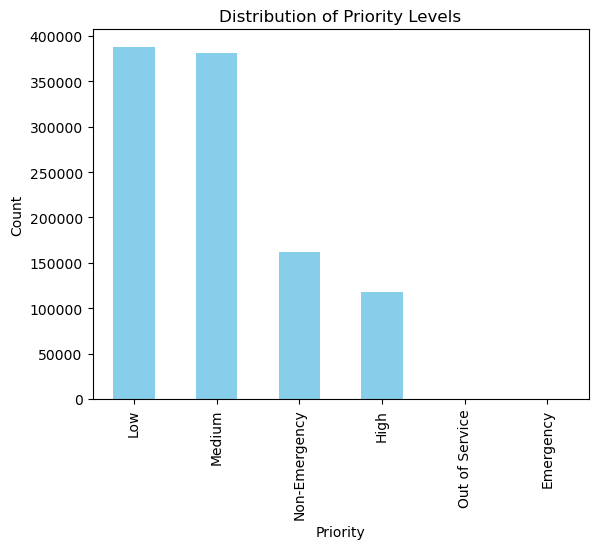

In [25]:
# Exploratory Data Analysis (EDA)
# 1. Distribution of priority levels
print("\nDistribution of Priority Levels:")
priority_counts = data['priority'].value_counts()
print(priority_counts)
priority_counts.plot(kind='bar', title='Distribution of Priority Levels', color='skyblue')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()


Top 10 Call Descriptions:
description
DISORDERLY        146716
911/NO  VOICE     119107
AUTO ACCIDENT      57987
COMMON ASSAULT     56121
SILENT ALARM       50512
FAMILY DISTURB     36312
NARCOTICS          36289
OTHER              36286
HIT AND RUN        27743
LARCENY            26737
Name: count, dtype: int64


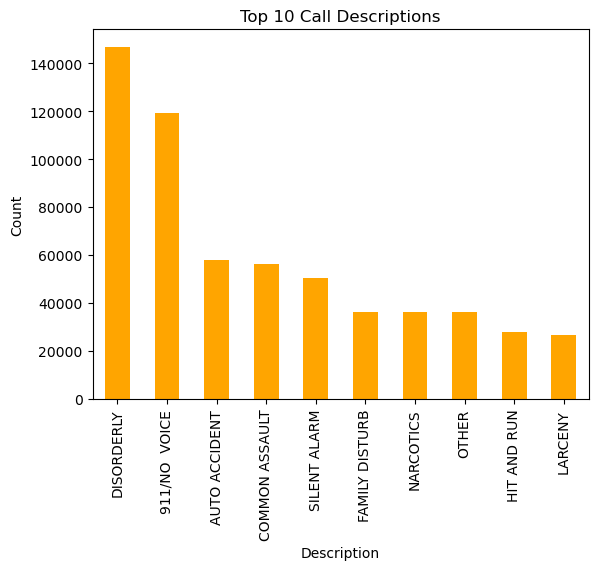

In [27]:
# 2. Most common call descriptions
print("\nTop 10 Call Descriptions:")
call_description_counts = data['description'].value_counts().head(10)
print(call_description_counts)
call_description_counts.plot(kind='bar', title='Top 10 Call Descriptions', color='orange')
plt.xlabel('Description')
plt.ylabel('Count')
plt.show()



Calls by District:
district
NE      142055
CD      127518
SD      121794
SE      114099
NW      109092
ND      105978
SW      101813
ED       81009
WD       76389
TRU      65063
SS        3464
CW         300
EVT1         1
Name: count, dtype: int64


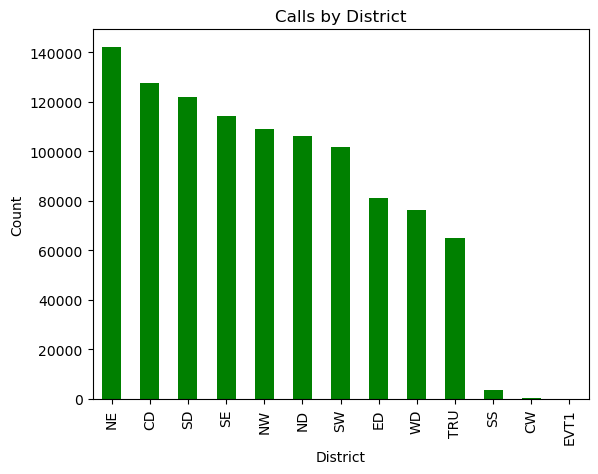

In [29]:
# 3. Calls by district
print("\nCalls by District:")
district_counts = data['district'].value_counts()
print(district_counts)
district_counts.plot(kind='bar', title='Calls by District', color='green')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

In [33]:
# 4. Time-based analysis
# Convert 'callDateTime' to datetime
data['callDateTime'] = pd.to_datetime(data['callDateTime'], errors='coerce')

In [35]:
# Extract date and hour from 'callDateTime'
data['date'] = data['callDateTime'].dt.date
data['hour'] = data['callDateTime'].dt.hour


Number of Calls by Hour:
hour
0     54518
1     54040
2     50338
3     46962
4     42722
5     35261
6     30301
7     25874
8     21510
9     19584
10    20152
11    26087
12    33383
13    38654
14    42943
15    46715
16    49583
17    51285
18    55461
19    61296
20    61693
21    61248
22    61789
23    57176
Name: count, dtype: int64


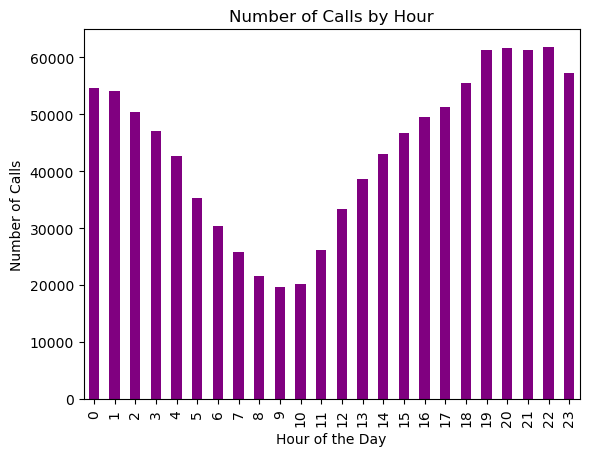

In [44]:
# Plot the number of calls by hour
print("\nNumber of Calls by Hour:")
call_counts_by_hour = data['hour'].value_counts().sort_index()
print(call_counts_by_hour)
call_counts_by_hour.plot(kind='bar', title='Number of Calls by Hour', color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.show()